In [1]:
import geopandas as gpd
import pandas as pd

In [2]:
mun_obr_arctic = gpd.read_file('data/mun_obr_arctic.geojson')
data = mun_obr_arctic
data.head(3)

,id,NAME,type,level_,sub,id_full,region,district,okrug,people,OKTMO,OKATO,geometry
0,143786,Приморский,Район,3,3,191,Архангельская область,Приморский район,,24938,11652000000,11252000000,"MULTIPOLYGON (((6752340.851 16757142.533, 6747..."
1,143844,Лешуконский,Район,3,3,196,Архангельская область,Лешуконский район,,5693,11638000000,11238000000,"MULTIPOLYGON (((5459088.704 9724030.198, 54604..."
2,143788,Онежский,Район,3,3,198,Архангельская область,Онежский район,,27705,11646000000,11246000000,"MULTIPOLYGON (((4137834.751 9506878.049, 41661..."


In [3]:
print (data.crs.name)
data = data.to_crs('WGS84')
print(data.crs.name)
mun_obr_arctic = data
data.head(3)

WGS 84 / Pseudo-Mercator
WGS 84


,id,NAME,type,level_,sub,id_full,region,district,okrug,people,OKTMO,OKATO,geometry
0,143786,Приморский,Район,3,3,191,Архангельская область,Приморский район,,24938,11652000000,11252000000,"MULTIPOLYGON (((60.65731 81.73228, 60.61781 81..."
1,143844,Лешуконский,Район,3,3,196,Архангельская область,Лешуконский район,,5693,11638000000,11238000000,"MULTIPOLYGON (((49.03983 65.43550, 49.05216 65..."
2,143788,Онежский,Район,3,3,198,Архангельская область,Онежский район,,27705,11646000000,11246000000,"MULTIPOLYGON (((37.17080 64.61190, 37.42486 64..."


<Axes: >

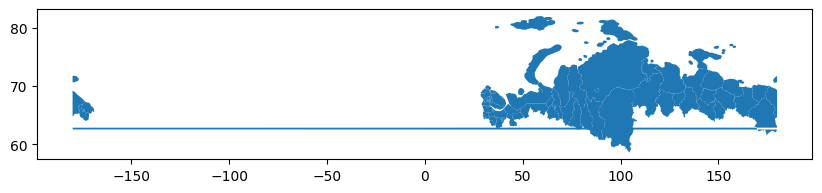

In [4]:
data.plot(figsize=(10,10))

In [6]:
all_res = []

def convert(objectid):
    obj = data[data.id == objectid]
    for _, row in obj.iterrows():
        seq = row.geometry.geoms
        polygons = []
        for polygon in seq:
            x, y = polygon.exterior.xy
            pairs = zip(x, y)
            coords = []
            for pair in pairs:
                coords.append([pair[1], pair[0]])
            polygons.append(coords)
        obj = {}
        obj['id'] = objectid
        obj['NAME'] = row.NAME
        obj['type'] = row.type
        obj['level_'] = row.level_
        obj['sub'] = row['sub']
        obj['id_full'] = row.id_full
        obj['region'] = row.region
        obj['district'] = row.district
        obj['okrug'] = row.okrug
        obj['people'] = row.people
        obj['OKTMO'] = row.OKTMO
        obj['OKATO'] = row.OKATO
        obj['geometry'] = polygons

        all_res.append(obj)

data = mun_obr_arctic
objectids = data.id
for objectid in objectids:
    convert(objectid)

mun_obr_arctic_df = pd.DataFrame(all_res)
data = mun_obr_arctic_df
data.head(3)

,id,NAME,type,level_,sub,id_full,region,district,okrug,people,OKTMO,OKATO,geometry
0,143786,Приморский,Район,3,3,191,Архангельская область,Приморский район,,24938,11652000000,11252000000,"[[[81.73228389994497, 60.657309900379154], [81..."
1,143844,Лешуконский,Район,3,3,196,Архангельская область,Лешуконский район,,5693,11638000000,11238000000,"[[[65.43549910017329, 49.03982819987767], [65...."
2,143788,Онежский,Район,3,3,198,Архангельская область,Онежский район,,27705,11646000000,11246000000,"[[[64.61189679986897, 37.17080199984193], [64...."


In [7]:
data.to_csv('data/mun_obr_arctic_lense.csv', index=False)